<a href="https://colab.research.google.com/github/LuciaBossio/Entrega-Final-Garcia-Bossio/blob/main/ProyectoDSParteI%2BGarcia_Bossio_ENTREGA_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Entrega finalGarcia Bossio

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
uploaded = files.upload()

Saving ventas_tienda Bossio V2.csv to ventas_tienda Bossio V2.csv


In [4]:
import pandas as pd
df=pd.read_csv('ventas_tienda Bossio V2.csv', sep=';', encoding='latin-1')
df.head()
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
print=df

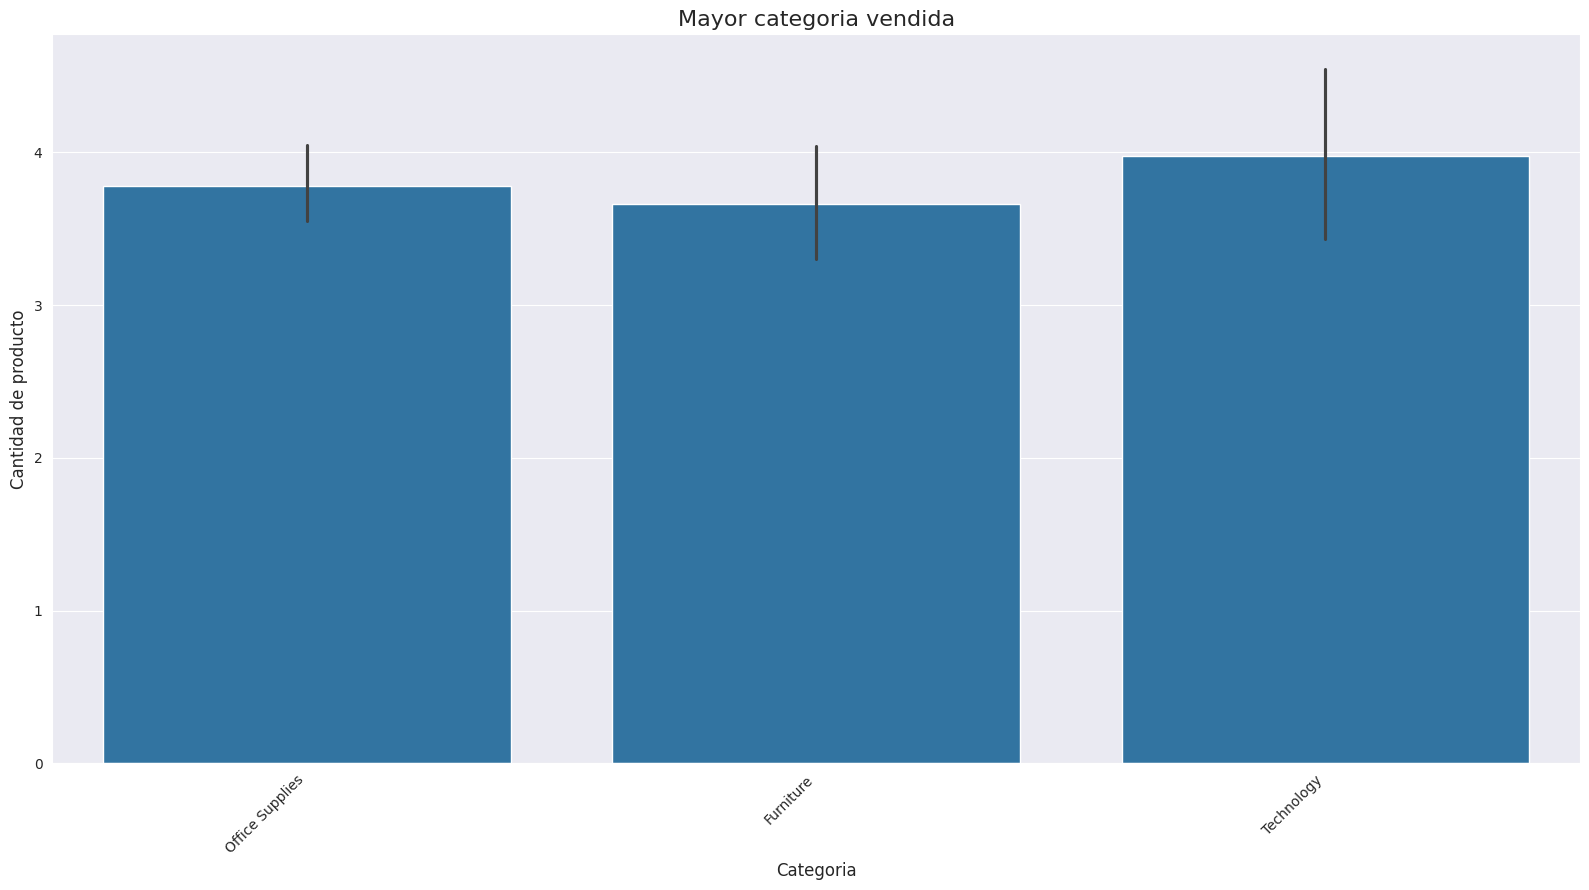

In [6]:
plt.figure(figsize=(16, 9))
sns.set_style("darkgrid")
ax = sns.barplot(x="categoria_producto", y="cantidad", data=df)
plt.title('Mayor categoria vendida', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Cantidad de producto', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

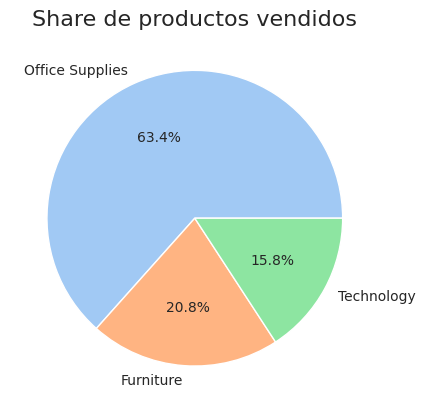

In [7]:
data = df['categoria_producto'].value_counts()
labels=data.index
colors = sns.color_palette("pastel")
plt.pie(data, colors=colors, labels=labels, autopct='%1.1f%%')
plt.title('Share de productos vendidos', fontsize=16)
plt.show()

In [8]:
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'], format='%d/%m/%Y', dayfirst=True)

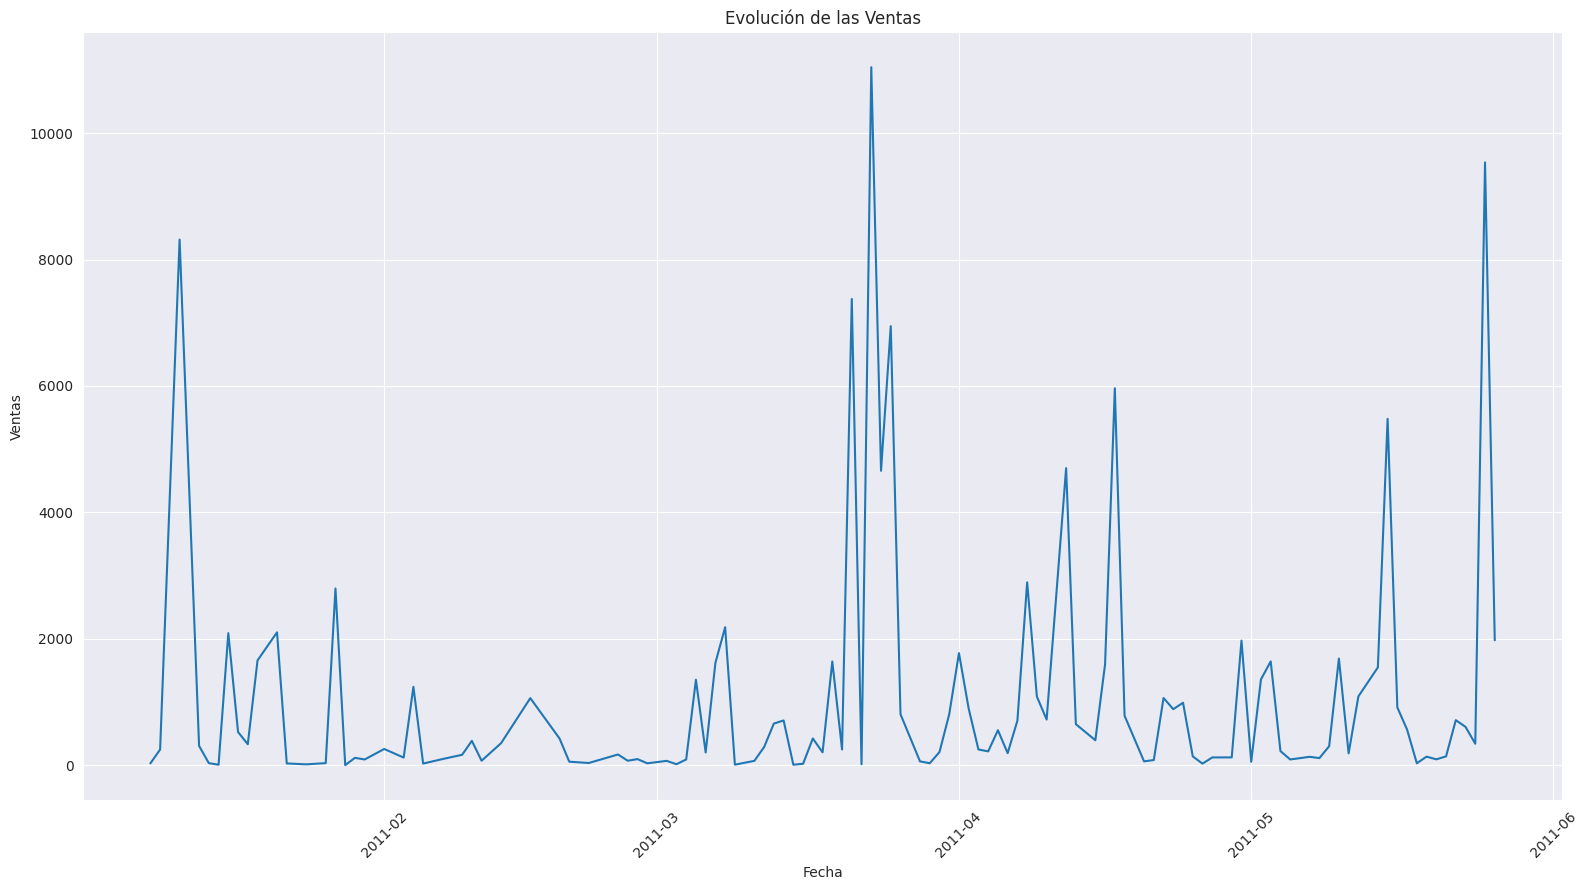

In [9]:
sales_over_time = df.groupby('fecha_venta')['total_venta'].sum()

plt.figure(figsize=(16, 9))
sns.lineplot(x=sales_over_time.index, y=sales_over_time.values)
plt.title('Evolución de las Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**1) Elegir un método de feature selection para reducir la dimensionalidad del dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ventas_tienda Bossio V2.csv to ventas_tienda Bossio V2 (1).csv


In [ ]:
import pandas as pd
data = pd.read_csv('ventas_tienda Bossio V2 (1).csv', encoding='latin-1', sep=';')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import io

In [ ]:
for col in data.select_dtypes(include=np.number).columns:
    data[col] = data[col].fillna(data[col].mean())

In [ ]:
categorical_cols = ['nombre_producto', 'categoria_producto', 'nombre_cliente','id_producto','id_cliente']
for col in categorical_cols:
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.codes

In [ ]:
data['fecha_venta'] = pd.to_datetime(data['fecha_venta'], format='%d/%m/%Y').astype(int) // 10**9

In [ ]:
X = data.drop('total_venta', axis=1, errors='ignore')
y = data['total_venta'] if 'total_venta' in data.columns else None

if y is None:
    print("Error: La columna 'total_venta' no se encuentra en el dataset.")
    exit()

print("Forma de X después de la división:", X.shape)
print("Forma de y después de la división:", y.shape)

Forma de X después de la división: (500, 9)
Forma de y después de la división: (500,)


In [ ]:
print("Forma de X después de limpiar NaN:", X.shape)
print("Forma de y después de limpiar NaN:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)

Forma de X después de limpiar NaN: (500, 9)
Forma de y después de limpiar NaN: (500,)
Forma de X_train: (350, 9)
Forma de X_test: (150, 9)


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
importances = model.feature_importances_

In [ ]:
feature_importances = pd.Series(importances, index=X.columns)
print("Importancia de las características:")
print(feature_importances.sort_values(ascending=False))

Importancia de las características:
precio_unitario       0.923378
cantidad              0.034362
nombre_producto       0.011454
nombre_cliente        0.009426
id_venta              0.008124
fecha_venta           0.004932
id_producto           0.003749
id_cliente            0.003599
categoria_producto    0.000976
dtype: float64


**2) Elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import io

In [ ]:
data = pd.read_csv('ventas_tienda Bossio V2 (1).csv', encoding='latin-1', sep=';')

In [ ]:
for col in data.select_dtypes(include=np.number).columns:
    data[col] = data[col].fillna(data[col].mean())

In [ ]:
categorical_cols = ['nombre_producto', 'categoria_producto', 'nombre_cliente','id_producto','id_cliente']
for col in categorical_cols:
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.codes

In [ ]:
data['fecha_venta'] = pd.to_datetime(data['fecha_venta'], format='%d/%m/%Y').astype(int) // 10**9

In [ ]:
X = data.drop('total_venta', axis=1, errors='ignore')
y = data['total_venta'] if 'total_venta' in data.columns else None

if y is None:
    print("Error: La columna 'total_venta' no se encuentra en el dataset.")
    exit()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

MSE: 75786.629044
MAE: 53.72453333333333
R2: 0.8849787956189801
